# Day 5 Lunch Assignment -- 1000 Genomes Project

# 1) Read in the data

In [2]:
#Import modules
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Import the data
df_snp = pd.read_csv("https://www.dropbox.com/s/p2ef992kl2jmmis/matrix_1kg.txt?dl=1",
                       sep = "\t")

df_snp

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2) Load the data into a pandas data frame. Calculate the "alternate allele frequency" for each SNP. This is defined as the total number of counts of alternate alleles divided by the total number of chromosomes in the population (i.e., the number of samples x 2). Plot the allele frequency spectrum (a histogram of the allele frequencies across SNPs).

In [47]:
#subset the data to exclude first 4 rows 
df_snp_subset = df_snp.iloc[:,4:]
#Calculate the sum of each row
df_snp_sums = df_snp_subset.sum(axis=1)
df_snp_sums

0         2
1        98
2        17
3        11
4         2
       ... 
9995    105
9996      1
9997      7
9998    147
9999     13
Length: 10000, dtype: int64

In [50]:
#calc the total chromosomes in the population
total_chroms = 2548 * 2

#divide each row by the total
alt_allele_freq = df_snp_sums / total_chroms
alt_allele_freq

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64

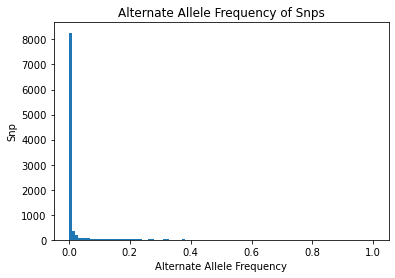

In [55]:
#Plot histogram of alternative allele freq by snp
fig, ax = plt.subplots()
ax.hist(alt_allele_freq, bins=100)
plt.title("Alternate Allele Frequency of Snps")
plt.xlabel("Alternate Allele Frequency")
plt.ylabel("Snp")
plt.show()

# 3) Subset the data frame to "common variation", where the alternate allele frequency is between 0.05 and 0.95

In [32]:
#roi = alt_allele_freq >= 0.05 & <= 0.96
#roi = alt_allele_freq <= 0.95
common_variation = alt_allele_freq[(alt_allele_freq<=0.95) & (alt_allele_freq>=0.05)]
common_variation

20      0.080259
32      0.595761
38      0.405612
41      0.094388
46      0.097527
          ...   
9957    0.841837
9959    0.115973
9974    0.180730
9975    0.810047
9980    0.077708
Length: 986, dtype: float64

# 4) Using only common variants, perform principal components analysis to cluster the samples based on their SNP genotypes. Use PC1 and PC2

In [45]:
#subset the df by the common variants
df_snp_common_variants = df_snp_subset.iloc[common_variation.index,:]
df_snp_common_variants

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32,1,2,1,1,1,1,0,0,0,1,...,1,1,2,0,0,0,1,1,1,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,1,2,2,2,2,2,1,2,2,1,...,2,2,2,2,2,2,2,2,1,2
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9975,2,1,0,1,0,1,0,1,2,2,...,1,2,2,2,2,1,2,2,2,2


In [46]:
#prepare pca input 
pca_input = df_snp_common_variants
#transpose because we want the PCA to find the variation between 
#different people and not the snps
pca_input = pca_input.T

#standardize the mean and variation
pca_input_standardized = StandardScaler().fit_transform(pca_input)
pca_input_standardized.mean(axis = 0)
pca_input_standardized.var(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [56]:
#store 10 principle components, counts data to pca output
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output

#check the shape for number of values (samples) and number of principle components
pca_output.shape

(2548, 10)

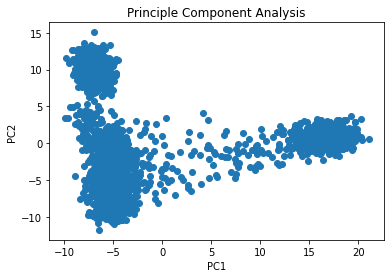

In [49]:
#Create PCA dataframe and fill it with pca_output
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df

#view the PCA
fig, ax = plt.subplots()
plt.title("Principle Component Analysis")
plt.xlabel("PC1")
plt.ylabel("PC2")
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])